1. Розробити засоби для обліку послуг хімчистки.
Квитанція про обслуговування містить дату, ідентифікаційні номери клієнта і категорії, до якої відноситься річ, та вагу речі.
Клієнт характеризується ідентифікаційним номером і прізвищем. Ідентифікаційний номер зареєстро- ваного клієнта є натуральним числом, ідентифікаційним номером незареєстрованих є число нуль.
Категорія речі характеризується ідентифікаційним номером, назвою і ціною чистки 1 кг ваги. Для зареєстрованих клієнтів надається знижка к%..
Про кожну операцію сервісу робиться обліковий запис у форматі номер операції == дата == ідентифікаційний номер клієнта ідентифікаційний номер категорії речі == вага речі.
Інформація про сервіси, клієнтів та категорії речей подана окремими csv-файлами.
2. Отримати:
(а) табличку, в якій для кожної категорії (вказати її назву) пораховано сумарну вартість усіх сер- вісів; впорядкувати за спаданням суми;
(6) діаграму до попереднього пункту;
(в) категорії речей, які принесли найбільший прибуток за період часу, заданий віджетами.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import unittest

In [2]:
categories = pd.read_csv('categories.csv')

In [3]:
clients = pd.read_csv('clients.csv')
clients.replace('Missing', np.nan, inplace=True)


In [4]:
services = pd.read_csv('services.csv')
services['Date'] = pd.to_datetime(services['Date'])


In [5]:
all_df = services.merge(categories, on='IdCategory')
all_df = all_df.merge(clients, on='IdClient')


In [6]:
filt = (all_df['IdClient'] == 0)
all_df.loc[filt, 'Discount'] = 0
all_df.set_index('NumService', inplace=True)
all_df

,Date,IdClient,IdCategory,Weight,NameCategory,CostPerKg,Discount,LastClient
NumService,,,,,,,,
1,2024-11-28,1,13,3.0,Sheep,270,0.05,Dosiak
2,2024-11-29,2,11,4.5,Syntetix,350,0.05,Stasiv
3,2024-11-29,4,12,3.0,Natural,500,0.10,Doe
4,2024-11-30,0,14,5.6,Leaf,700,0.00,NaN
5,2024-12-01,3,12,2.5,Natural,500,0.10,Smith


### task a:

In [7]:
all_df['TotalCost'] = all_df['CostPerKg'] * all_df['Weight'] * (1 - all_df['Discount'])
total_income_per_category = all_df.groupby('NameCategory')['TotalCost'].sum().reset_index()
total_income_per_category

,NameCategory,TotalCost
0,Leaf,3920.00
1,Natural,2475.00
2,Sheep,769.50
3,Syntetix,1496.25


### task b:

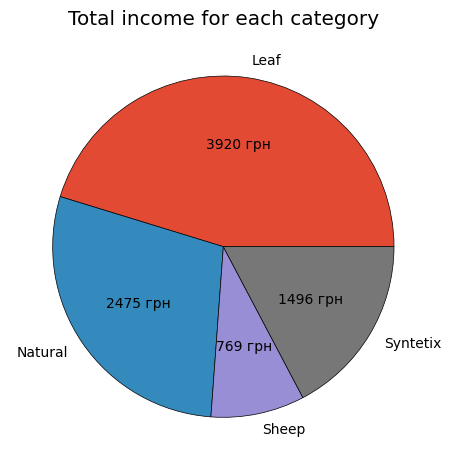

In [8]:
plt.style.use('ggplot')
autopct_func = lambda p: f"{int(p * total_income_per_category['TotalCost'].sum()/100)} грн"
plt.pie(total_income_per_category['TotalCost'], labels=total_income_per_category['NameCategory'], autopct= autopct_func, wedgeprops={'edgecolor': 'black'})
plt.title('Total income for each category')
plt.tight_layout()
plt.show()

### task c:

In [9]:
def get_category_with_max_income(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filt = (all_df['Date'] >= start_date) & (all_df['Date'] <= end_date)
    filtered_df = all_df.loc[filt]

    category = filtered_df.groupby(['Date', 'NameCategory'])['TotalCost'].sum().reset_index()
    max_cost_each_day = category.groupby('Date')['TotalCost'].max().reset_index()

    category = category.merge(max_cost_each_day, on=['Date', 'TotalCost'])
    
    display(category)


In [10]:
start = widgets.DatePicker(
    description = 'start date',
    value = all_df['Date'].min()
)

end = widgets.DatePicker(
    description = 'end date',
    value = all_df['Date'].max()
)


In [11]:
widget = widgets.interactive(get_category_with_max_income, start_date = start, end_date = end)
display(widget)

interactive(children=(DatePicker(value=Timestamp('2024-11-28 00:00:00'), description='start date', step=1), Da…

### Types:

In [12]:
class Client:
    def __init__(self, id_client, last):
        self.__id_client = id_client
        self.__last = last

    @property
    def id_client(self):
        return self.__id_client

    @id_client.setter
    def id_client(self, new):
        if new < 0:
            raise ValueError('Id must be >= 0')

        self.__id_client = new

    @property
    def last(self):
        return self.__last

    @last.setter
    def last(self, new):
        self.__last = new

In [13]:
class TestClient(unittest.TestCase):
    def setUp(self):
        self.client1 = Client(1, 'Doe')
        self.client2 = Client(2, 'Smith')

    def test_id(self):
        self.assertEqual(self.client1.id_client, 1)
        self.assertEqual(self.client2.id_client, 2)

        self.client1.id_client = 3
        self.client2.id_client = 4

        self.assertEqual(self.client1.id_client, 3)
        self.assertEqual(self.client2.id_client, 4)

        with self.assertRaises(ValueError):
            self.client1.id_client = -1

    def test_last(self):
        self.assertEqual(self.client1.last, 'Doe')
        self.assertEqual(self.client2.last, 'Smith')

In [14]:
unittest.main(argv = [''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


In [15]:
class Category:
    def __init__(self, id_category, name, cost):
        self.__id_category = id_category
        self.__name = name
        self.__cost = cost

    @property
    def id_category(self):
        return self.__id_category

    @id_category.setter
    def id_category(self, new):
        self.__id_category = new

    @property
    def name(self):
        return self.__name

    @name.setter
    def name(self, new):
        self.__name = new

    @property
    def cost(self):
        return self.__cost

    @cost.setter
    def cost(self, new):
        if new < 0:
            raise ValueError('Cost must be >= 0')
        self.__cost = new

In [16]:
class TestClient(unittest.TestCase):
    def setUp(self):
        self.category1 = Category(1, 'Doe', 350)
        self.category2 = Category(2, 'Smith', 450)

    def test_id(self):
        self.assertEqual(self.category1.id_category, 1)
        self.assertEqual(self.category2.id_category, 2)

        self.category1.id_category = 3
        self.category2.id_category = 4

        self.assertEqual(self.category1.id_category, 3)
        self.assertEqual(self.category2.id_category, 4)

    def test_name(self):
        self.assertEqual(self.category1.name, 'Doe')
        self.assertEqual(self.category2.name, 'Smith')

        self.category1.name = 'test1'
        self.category2.name = 'test2'

        self.assertEqual(self.category1.name, 'test1')
        self.assertEqual(self.category2.name, 'test2')

    def test_cost(self):
        self.assertEqual(self.category1.cost, 350)
        self.assertEqual(self.category2.cost, 450)

        self.category1.cost = 100
        self.category2.cost = 200

        self.assertEqual(self.category1.cost, 100)
        self.assertEqual(self.category2.cost, 200)

        with self.assertRaises(ValueError):
            self.category1.cost = -10

In [17]:
unittest.main(argv = [''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK
